In [55]:
import pandas as pd
import numpy as np


In [20]:
df= pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [21]:
df2=df[['School DBN','School Name','School Level','Regents Exam','Year','Total Tested','Mean Score','Number Scoring Below 65','Number Scoring 80 or Above','Percent Scoring 80 or Above']]


Selected James Madison High School and U.S. History and Goverment Exam

In [37]:
School_Exam = df2[(df2['Regents Exam'] == 'U.S. History and Government') & (df2['School Name'] == 'James Madison High School')]
School_Exam.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 80 or Above,Percent Scoring 80 or Above
12962,22K425,James Madison High School,High school,U.S. History and Government,2015,343,72.5,78,121.0,35.3
12963,22K425,James Madison High School,High school,U.S. History and Government,2016,726,81.4,72,473.0,65.2
12964,22K425,James Madison High School,High school,U.S. History and Government,2017,804,78.5,141,460.0,57.2
42713,22K425,James Madison High School,High school,U.S. History and Government,2015,299,74.3,54,116.0,38.8
42714,22K425,James Madison High School,High school,U.S. History and Government,2015,44,59.9,24,5.0,11.4


drop NaN data

In [24]:
df2['Number Scoring 80 or Above'] = pd.to_numeric(df2['Number Scoring 80 or Above'], errors='coerce')


<ipython-input-24-5decdba12899>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Number Scoring 80 or Above'] = pd.to_numeric(df2['Number Scoring 80 or Above'], errors='coerce')


In [ ]:
df2.dropna()

percentage -students scored 80 or above -

In [69]:
all_schools = df2[df2['Regents Exam'] == 'U.S. History and Government']

average_percentage_by_class = all_schools.groupby('School Name').agg({ 'Number Scoring 80 or Above': 'mean','Total Tested': 'mean'})

average_percentage_by_class['Percentage 80 or Above'] = (average_percentage_by_class['Number Scoring 80 or Above'] / average_percentage_by_class['Total Tested']) * 100

average_percentage_by_class = average_percentage_by_class.dropna(subset=['Percentage 80 or Above'])

sorted_schools_by_class = average_percentage_by_class.sort_values(by='Percentage 80 or Above', ascending=False)


sorted_schools_by_class.head()


,Number Scoring 80 or Above,Total Tested,Percentage 80 or Above
School Name,,,
The Math & Science Exploratory School,18.750000,12.368421,151.595745
I.S. 141 The Steinway,8.833333,5.882353,150.166667
I.S. 034 Tottenville,45.600000,34.310345,132.904523
J.H.S. 074 Nathaniel Hawthorne,68.347826,53.484848,127.789137
I.S. 237,57.666667,45.625000,126.392694


In [ ]:
average_percentage_school_exam = School_Exam.groupby('School Name').agg({ 'Number Scoring 80 or Above': 'mean', 'Total Tested': 'mean'})

In [89]:
average_percentage_school_exam['Percentage 80 or Above'] = (average_percentage_school_exam['Number Scoring 80 or Above'] / average_percentage_school_exam['Total Tested']) * 100


,Number Scoring 80 or Above,Total Tested,Percentage 80 or Above
School Name,,,
James Madison High School,148.142857,240.128205,61.693235


In [ ]:
sorted_schools_exam = average_percentage_school_exam.sort_values(by='Percentage 80 or Above', ascending=False)
sorted_schools_exam


In [92]:
general_cl = df2[df2['Regents Exam'] == 'U.S. History and Government']
general_cl.mean()

<ipython-input-92-03b7ca676141>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  general_cl.mean()


Year                          2016.021003
Total Tested                    58.811564
Number Scoring 80 or Above      34.831074
dtype: float64

In [ ]:
james_madison_data = sorted_schools_exam.loc['James Madison High School', 'Percentage 80 or Above']
james_madison_percentage = pd.Series([james_madison_mean_percentage], index=['James Madison High School'])


Text(0.5, 1.0, 'Comparison of Average Percentage - James Madison High School vs. Overall')

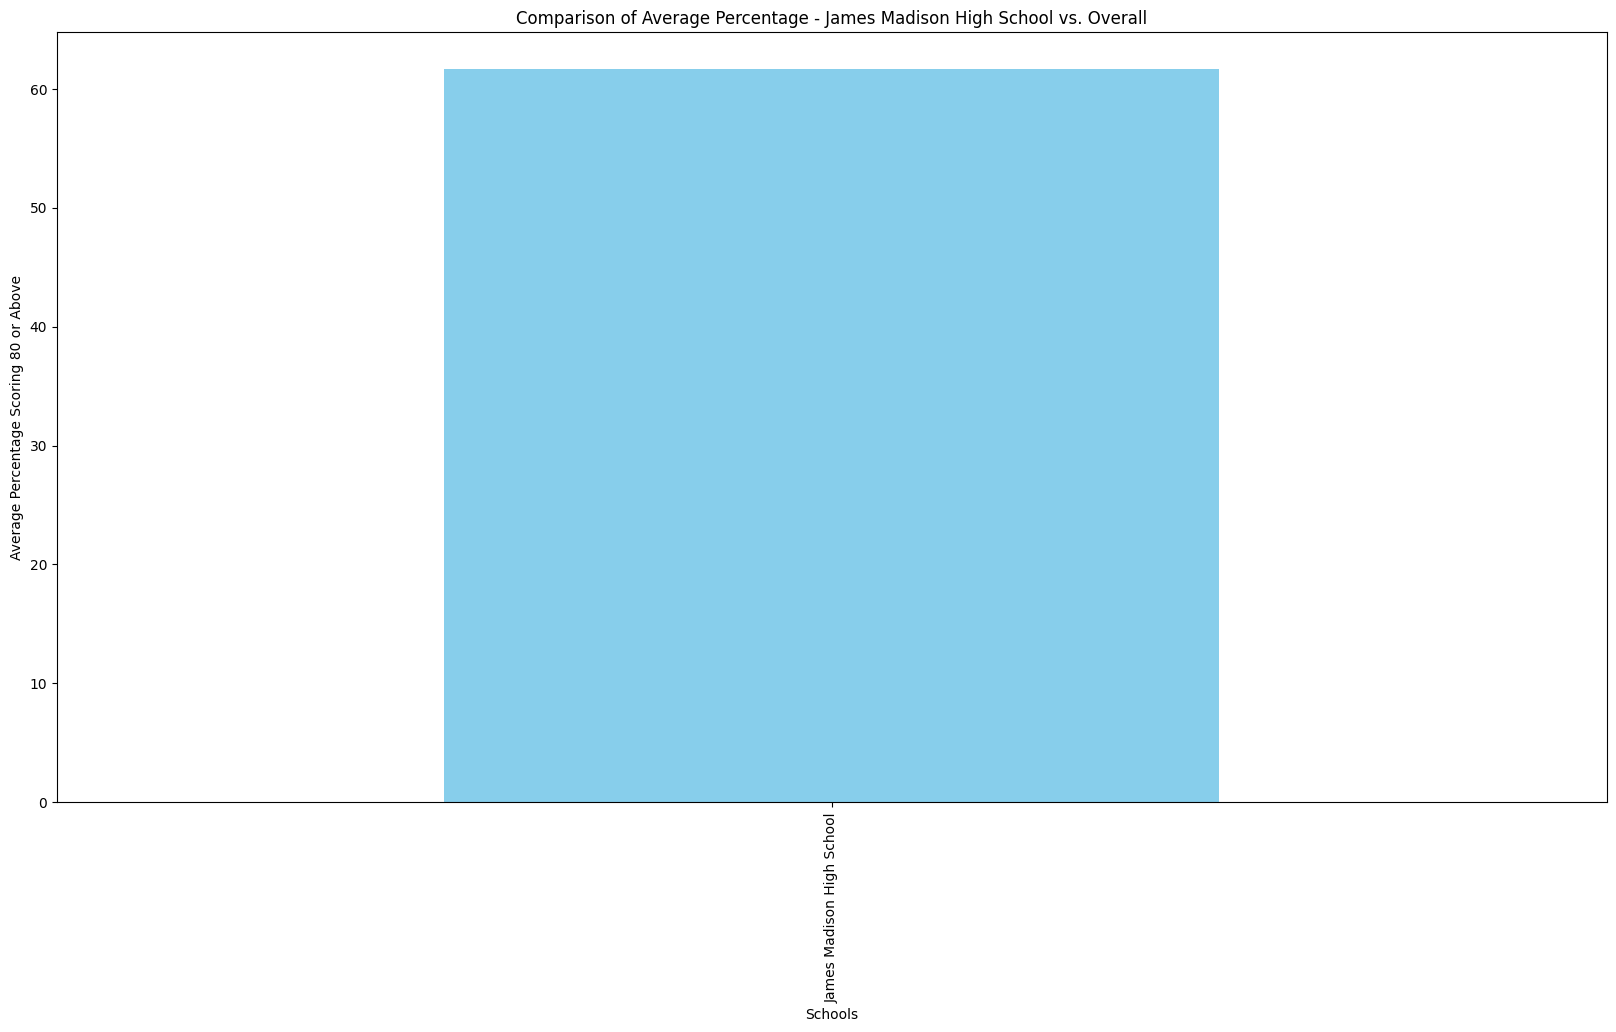

In [81]:
ax = james_madison_percentage.plot(kind='bar', figsize=(20, 10), color=['skyblue', 'orange'])
ax.set_xlabel('Schools')
ax.set_ylabel('Average Percentage Scoring 80 or Above')
ax.set_title('Comparison of Average Percentage - James Madison High School vs. Overall')


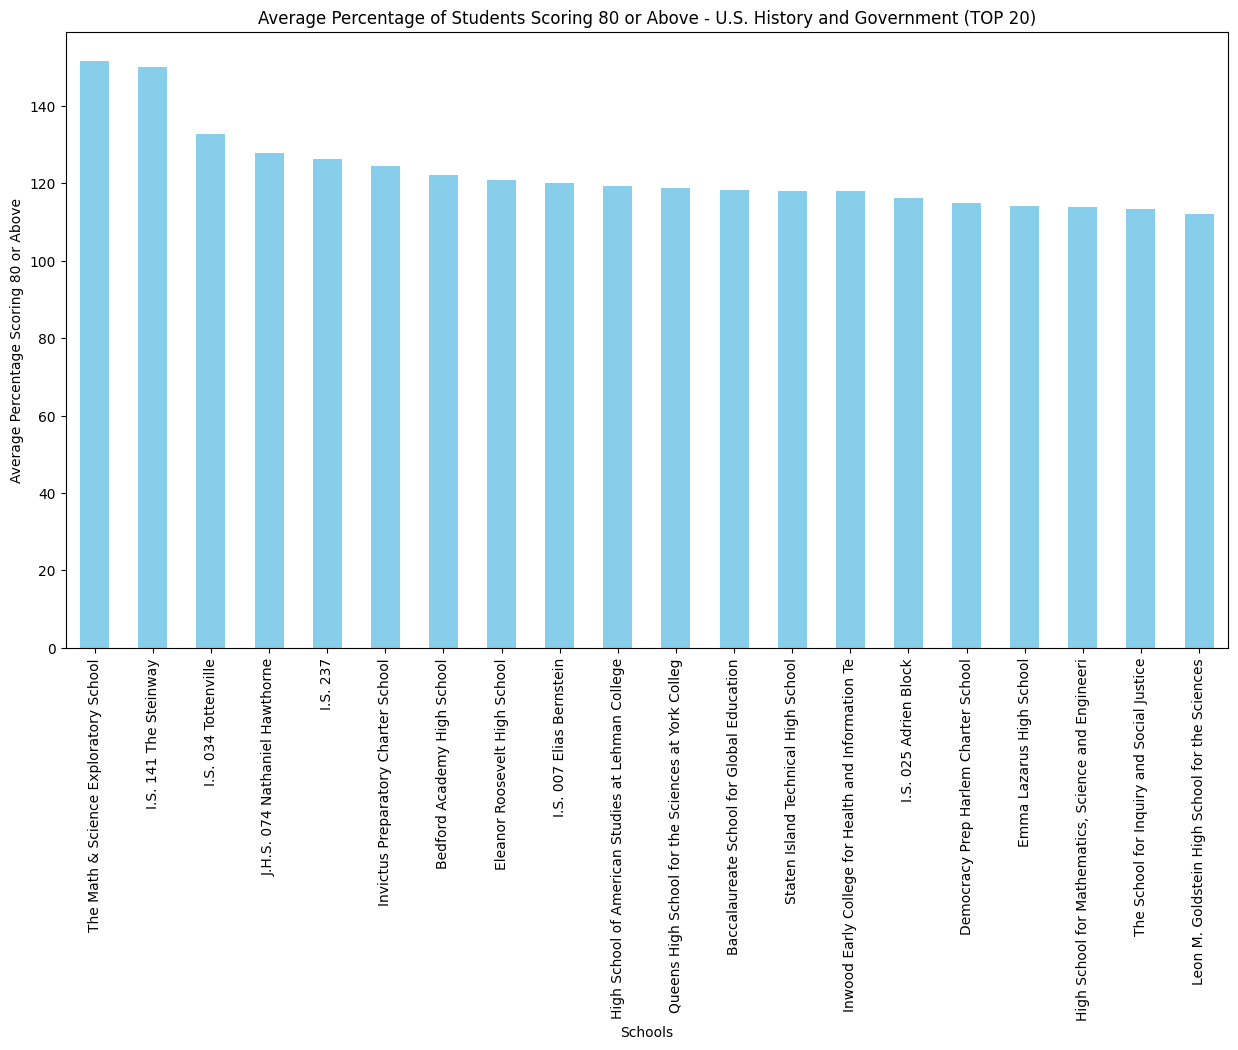

In [86]:
top_20_ = sorted_schools_by_class.head(20)
ax = top_20_['Percentage 80 or Above'].plot(kind='bar', figsize=(15, 8), color='skyblue')
ax.set_xlabel('Schools')
ax.set_ylabel('Average Percentage Scoring 80 or Above')
ax.set_title('Average Percentage of Students Scoring 80 or Above - U.S. History and Government (TOP 20)')

james_madison = sorted_schools_exam.loc['James Madison High School']
top_20_ = pd.concat([top_20_, sorted_schools_exam])




Applied data cleaning by converting relevant columns to numeric, handling 's' values, and dropping NaN values.

Focused on analyzing student test performance for a specific school (James Madison High School) and a specific exam ('U.S. History and Government').
Chose the metric of interest: the percentage of students scoring 80 or above.
Created bar chart visualizations to compare James Madison High School with other high schools and to compare schools in a specific exam.

Grouped data by school and calculated average percentages.
dropped unnecessary columns.

I focus on a specific class ('U.S. History and Government') and compared how schools performed in that class.

